<a href="https://colab.research.google.com/github/PreciousSteve/Netflix-Exploratory-Data-Analysis-Project/blob/main/Netflix_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Overview:

The Netflix EDA Project delves into the world of Netflix, one of the leading global entertainment platforms. This exploratory data analysis aims to uncover insights from a comprehensive dataset encompassing a multitude of movies and TV shows available on Netflix. By leveraging data visualization and statistical techniques, the project illuminates patterns, trends, and interesting facets within Netflix's diverse content library.

### Objective:

The primary objective of the Netflix EDA Project is to gain meaningful insights from Netflix's extensive collection of movies and TV shows. Through in-depth analysis, the project aims to:

1. **Explore Content Distribution:** Understand the distribution of movies and TV shows by genres, countries, and release years.
  
2. **Analyze User Preferences:** Investigate user preferences by examining the most common genres, ratings, and durations of content.
  
3. **Examine Content Trends:** Uncover trends over time, such as the growth in Netflix's content offerings per month and the popularity of specific genres.
  
4. **Highlight Director and Country Contributions:** Identify top directors and countries contributing significantly to Netflix's content library.

Through these objectives, the project provides a holistic view of Netflix's content landscape, aiding in strategic insights for both users and content creators.

### Data Description:

The dataset used in the Netflix EDA Project includes the following attributes:

- **show_id:** Unique identifier for each movie/TV show.
- **type:** Indicates whether the entry is a "Movie" or "TV Show."
- **title:** Title of the movie or TV show.
- **director:** Director(s) of the content.
- **cast:** Cast members featured in the content.
- **country:** Country or countries where the content was produced.
- **date_added:** Date when the content was added to Netflix.
- **release_year:** Year of release of the content.
- **rating:** Content rating.
- **duration:** Duration of movies/TV shows.
- **listed_in:** Genre categories the content falls under.
- **description:** Brief description of the content.

This dataset provides a rich source of information for exploring various facets of Netflix's content library, allowing for a comprehensive analysis of user preferences and content trends.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")

###Dataset

About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

###Source
https://www.kaggle.com/datasets/shivamb/netflix-shows

Making a copy of the dataset

In [ ]:
df = data.copy()

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Changing the "date_added" column datatype to the correct datatype

In [ ]:
df["date_added"] = pd.to_datetime(df["date_added"])

Let's confirm the changed datatype

In [ ]:
for column, dtype in zip(df.columns, df.dtypes):
    print(f"{column} : {dtype}")

show_id : object
type : object
title : object
director : object
cast : object
country : object
date_added : datetime64[ns]
release_year : int64
rating : object
duration : object
listed_in : object
description : object


Checking if there's any duplicate rows in the dataframe

In [ ]:
df[df.duplicated()].shape[0]

0

Found out that there are no duplicate rows

Checking number of null value in each column

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#droping all null rows
df = df.dropna()

##Movie vs. TV Show

The 2 large categories of products that we can find in the Netflix catalog are Movies and TV Shows.

We are going to figure out which of the 2 is more present in the Netflix catalog.

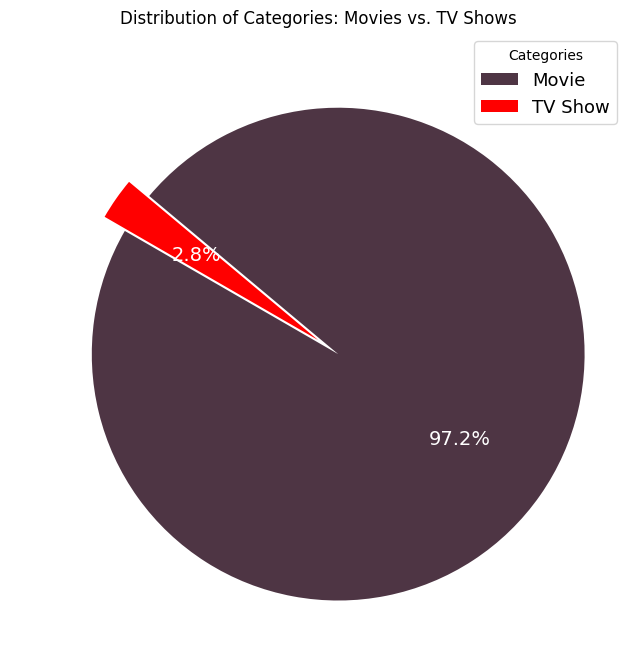

In [ ]:
type_counts = df["type"].value_counts()

plt.figure(figsize=(10, 8))
type_counts.plot.pie(explode = [0.1, 0], autopct='%1.1f%%', startangle=150,
                               colors=["#4e3544", "#ff0000"], title="Distribution of Categories: Movies vs. TV Shows", ylabel = "",
textprops={'color': 'white', 'fontsize':14})  # Set text color to white and fontsize to 14






plt.legend(loc="best", bbox_to_anchor=(1, 1), title="Categories", labels=type_counts.index,
           prop={'size': 13})  # Add legend based on

plt.show()

##Observation
We can see from the visualization,there is a big difference between the 2 categories as there are more movies than TV Shows in the Netflix Catalog

Let's divide our DataFrame into the two different categories so that we can analyze them differently.

In [ ]:
df_movie = df[df["type"] == "Movie"]
df_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...


In [ ]:
df_tvshow = df[df["type"] == "TV Show"]
df_tvshow.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
198,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,2021-08-27,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,2021-08-13,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
276,s277,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,2021-08-13,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...
297,s298,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,2021-08-06,2021,TV-MA,1 Season,TV Shows,"From amusement to awe, the nine human emotions..."


We want to look at the most category in which Netflix movie titles is listed in,or the most frequent and consequently the most requested by the spectators?

Splitting the values

In [ ]:
movie_listed_in = df_movie["listed_in"].str.split(', ')
print(movie_listed_in)

7       [Dramas, Independent Movies, International Mov...
9                                      [Comedies, Dramas]
12                         [Dramas, International Movies]
24      [Comedies, International Movies, Romantic Movies]
27                                             [Comedies]
                              ...                        
8801            [Dramas, International Movies, Thrillers]
8802                     [Cult Movies, Dramas, Thrillers]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 5185, dtype: object


<Figure size 1000x600 with 0 Axes>

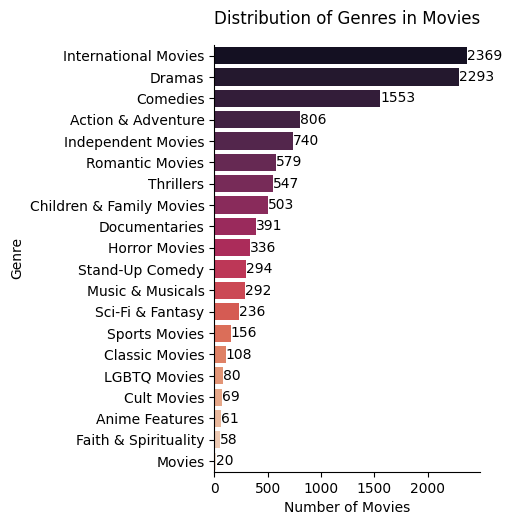

In [ ]:
#iterate through the split lists and print each string

genres = [genre for genre_list in movie_listed_in for genre in genre_list]

# Create a new DataFrame
df_genres = pd.DataFrame({'genre': genres})

#removing all leading and trailing spaces
df_genres['genre'] = df_genres['genre'].str.strip()

genre_sort = df_genres["genre"].value_counts().sort_values(ascending = False)

plt.figure(figsize=(10,6))

sns.catplot(y = "genre",
data = df_genres,
kind = "count", order = genre_sort.index, palette = "rocket")

plt.title("Distribution of Genres in Movies", y = 1.03)
plt.xlabel("Number of Movies")
plt.ylabel("Genre")

# Annotate the count of each genre on top of the bars
for index, value in enumerate(genre_sort.values):
    plt.text(value,index,str(value), color='black', ha="left", va="center", fontsize=10)


plt.show()

#Intertional movies, Drama and Comedy are the most common genres in movies, indicating viewers' preference for these genres. This finding can guide content production strategies, focusing on creating more international movies, dramas and comedies to cater to the audience's tastes.

Let's do same for TV shows

In [ ]:
tvshow_listed_in = df_tvshow["listed_in"].str.split(',')
print(tvshow_listed_in)

8                         [British TV Shows,  Reality TV]
198     [Crime TV Shows,  International TV Shows,  TV ...
273     [Crime TV Shows,  International TV Shows,  TV ...
276     [International TV Shows,  Romantic TV Shows,  ...
297                                            [TV Shows]
                              ...                        
8172                             [Kids' TV,  TV Comedies]
8214    [British TV Shows,  Docuseries,  International...
8293      [British TV Shows,  Crime TV Shows,  TV Dramas]
8302      [British TV Shows,  Crime TV Shows,  TV Dramas]
8599    [British TV Shows,  Classic & Cult TV,  TV Com...
Name: listed_in, Length: 147, dtype: object


<Figure size 1000x600 with 0 Axes>

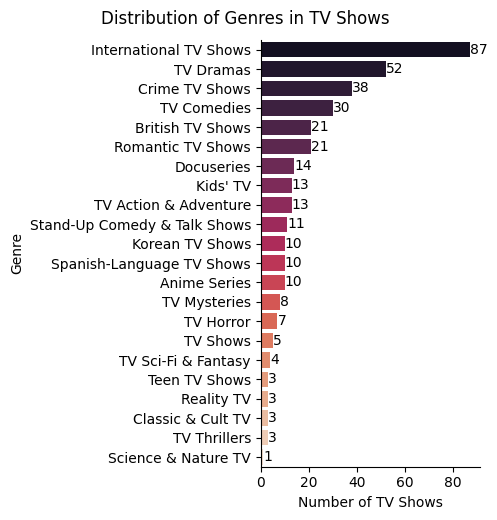

In [ ]:
#iterate through the split lists and print each string

genres = [genre for genre_list in tvshow_listed_in for genre in genre_list]

# Create a new DataFrame
df_genres = pd.DataFrame({'genre': genres})

df_genres['genre'] = df_genres['genre'].str.strip()

genre_sort = df_genres["genre"].value_counts().sort_values(ascending = False)

plt.figure(figsize= (10, 6))

g = sns.catplot(y = "genre",
data = df_genres,
kind = "count", order = genre_sort.index, palette= "rocket")

g.fig.suptitle("Distribution of Genres in TV Shows", y = 1.03)
g.set(xlabel = "Number of TV Shows",
ylabel = "Genre")

# Annotate the count of each genre on top of the bars
for index, value in enumerate(genre_sort.values):
    g.ax.text(value, index, str(value), color='black', ha="left", va="center", fontsize=10)




plt.show()

##Distribtion of release years
Let's see the distribution of release years

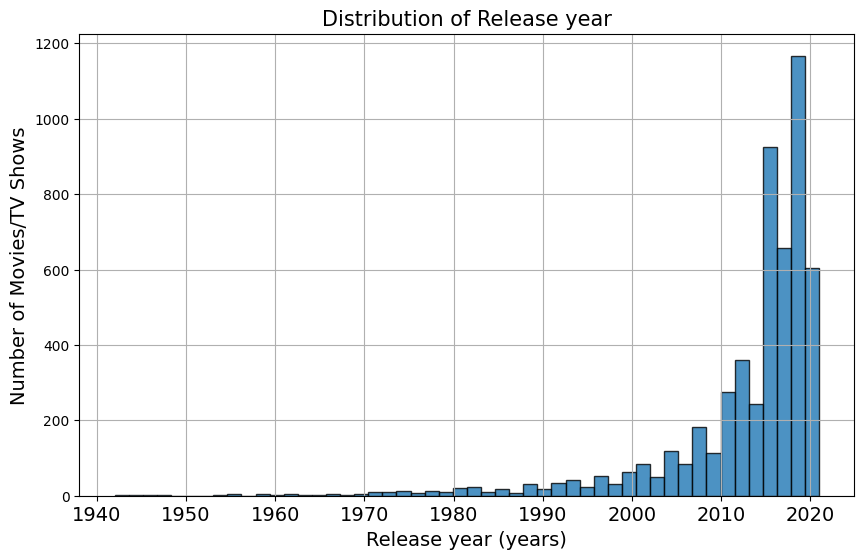

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(x = df["release_year"], bins = 50, edgecolor = "black", alpha = 0.8)
plt.title("Distribution of Release year", fontsize = 15)
plt.ylabel("Number of Movies/TV Shows", fontsize = 14)
plt.xlabel("Release year (years)", fontsize = 14)
plt.xticks(fontsize = 14)
plt.grid(True)
plt.show()

##Rating Distribution
Let's see the rating distribution

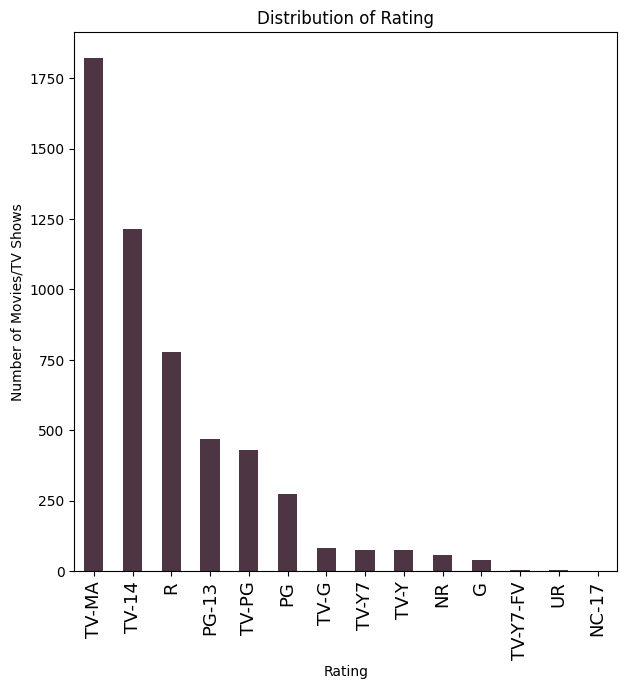

In [ ]:
df['rating'].value_counts().plot(kind='bar',figsize=(7,7),
title = "Distribution of Rating",
ylabel = "Number of Movies/TV Shows",
xlabel = "Rating", color = "#4e3544")
plt.xticks(fontsize = 13)
plt.show()

#Top 10 Directors
We are going to look at the top 10 directors by number of movie/tv show.

In [ ]:
df["director"] = df["director"].str.strip() #Removing all leading and trailing spaces

In [ ]:
director_split = df['director'].str.split(',')
print(director_split)

7              [Haile Gerima]
8           [Andy Devonshire]
9            [Theodore Melfi]
12      [Christian Schwochow]
24               [S. Shankar]
                ...          
8801        [Majid Al Ansari]
8802          [David Fincher]
8804        [Ruben Fleischer]
8805           [Peter Hewitt]
8806            [Mozez Singh]
Name: director, Length: 5332, dtype: object


In [ ]:
direcs = [dir for list in director_split for dir in list]

In [ ]:
directors = pd.DataFrame({"director":direcs})

In [ ]:
director_sort = directors["director"].value_counts().sort_values(ascending= False)

dir_top_10 = director_sort[:10]

<Figure size 1000x600 with 0 Axes>

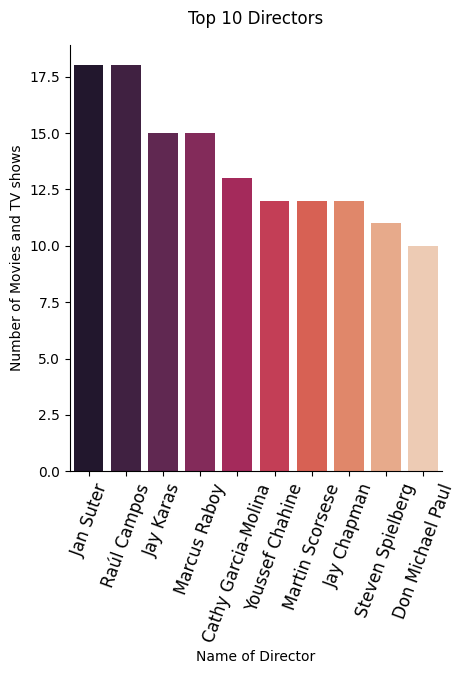

In [ ]:

plt.figure(figsize=(10,6))
sns.catplot(x = "director", data = directors, kind = "count", order = dir_top_10.index, palette = "rocket")


plt.title("Top 10 Directors", y = 1.03)
plt.ylabel("Number of Movies and TV shows")
plt.xlabel("Name of Director")
plt.xticks(rotation = 70, fontsize = 12)
plt.show()

##Countries per movie/Tv shows produced
We are going to look at the distribution of Countries by the number of shows/movies they produce

In [ ]:
country_split = df["country"].str.split(', ')

countries = [country for list in country_split for country in list]


#creating a dataframe
df_country = pd.DataFrame({"country":countries})


country_sort = df_country["country"].value_counts()

<Figure size 1000x600 with 0 Axes>

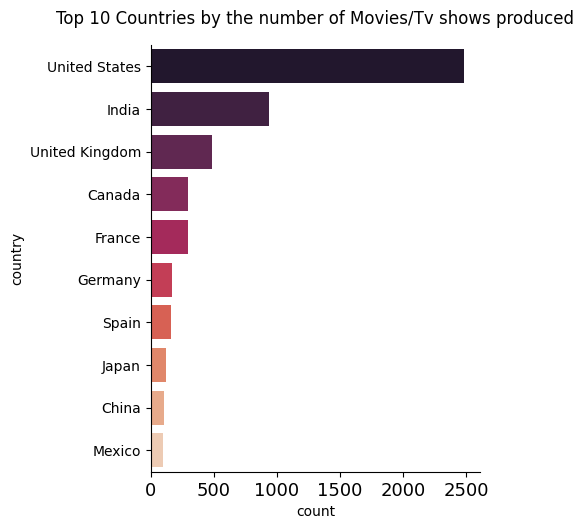

In [ ]:
plt.figure(figsize=(10,6))
sns.catplot(y = "country",
data = df_country, kind = "count",
order = country_sort[:10].index, palette = "rocket")

plt.title("Top 10 Countries by the number of Movies/Tv shows produced", y = 1.03)
plt.xlabel=("Name of Country")
plt.ylabel=("Number of Movies/TV Shows produced")
plt.xticks(fontsize = 13)

plt.show()

##Top 10 Duration of Movies/Tv shows
Distribution of the duration of Movies and TV Shows. We want to know what's the duration of most movies/TV Shows.

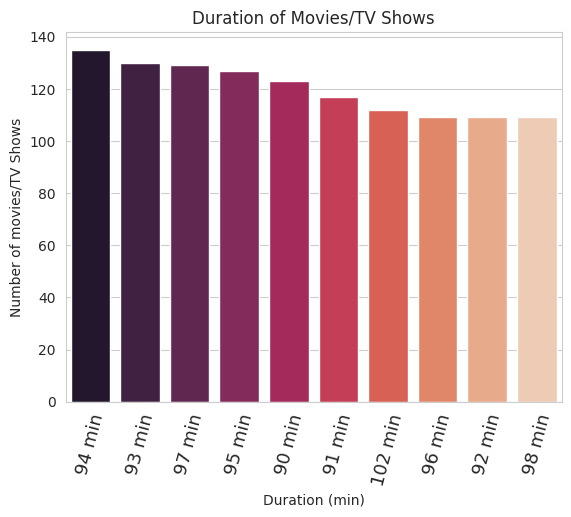

In [ ]:
netf_duration = df["duration"].value_counts().head(10)


g = sns.barplot(x = netf_duration.index, y = netf_duration.values,
data = df, palette = "rocket")

plt.title("Duration of Movies/TV Shows")

g.set_xlabel("Duration (min)")
g.set_ylabel("Number of movies/TV Shows")

plt.xticks(rotation= 75, fontsize= 13)

plt.show()

#Trend showing Number of Movies/TV Shows added per month

In [ ]:
df["month_added"] = df["date_added"].dt.month

month_count = df.groupby('month_added').size()


month_names = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

In [ ]:
print(month_count)

month_added
1     489
2     341
3     469
4     471
5     368
6     415
7     464
8     449
9     427
10    491
11    458
12    490
dtype: int64


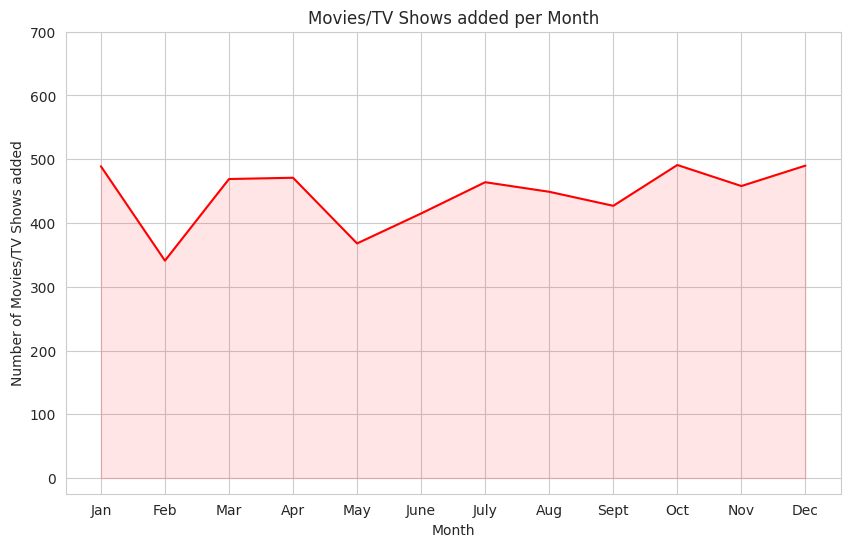

In [ ]:

plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
g = sns.lineplot(x = month_count.index, y = month_count.values, color = "red")
plt.fill_between(month_count.index, month_count.values, color = "red", alpha = 0.1)

plt.title("Movies/TV Shows added per Month")
g.set_ylabel("Number of Movies/TV Shows added")
g.set_xlabel("Month")
plt.xticks(ticks = month_count.index, labels=month_names)

# Custom y-tick positions and labels
ytick_positions = [0,100, 200, 300, 400, 500, 600, 700]  # Adjust these values according to your data range
ytick_labels = ["0", "100","200","300","400","500", "600", "700"]  # Corresponding labels for y-ticks

plt.yticks(ytick_positions, ytick_labels)

plt.show()

##Movie/Tv shows Discription
WordCloud of most common words in description of shows/movies

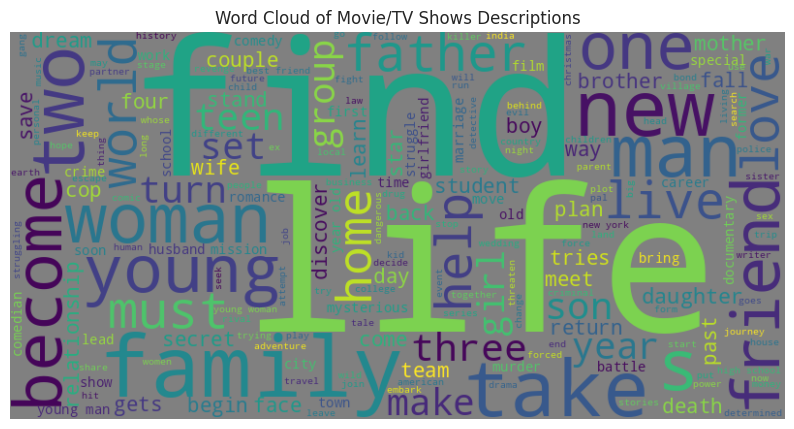

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
all_descriptions = ' '.join(df['description'])

stopwords = set(STOPWORDS)
processed_text = ' '.join([word.lower() for word in all_descriptions.split() if word.lower() not in stopwords])

wordcloud = WordCloud(width=800, height=400, background_color='gray').generate(processed_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie/TV Shows Descriptions')
plt.show()

##Distribution of Movie/TV Shows duration

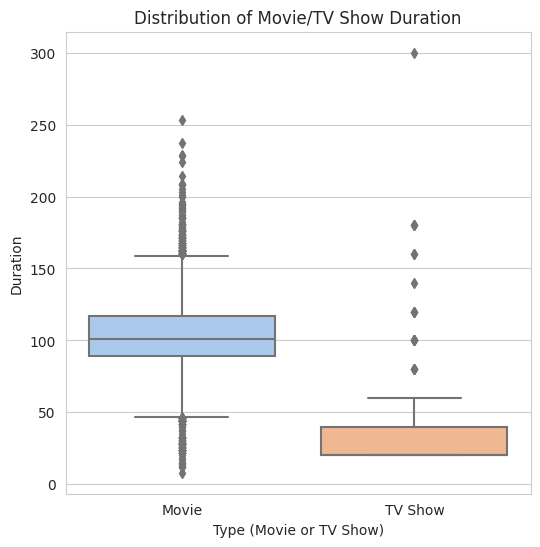

In [ ]:
def duration_to_minutes(duration):
    if 'min' in duration:
        return int(duration.split(' ')[0])
    elif 'Season' in duration:
        return int(duration.split(' ')[0]) * 20 # Assuming 1 season is approximately 20 episodes

df['duration_minutes'] = df['duration'].apply(duration_to_minutes)

plt.figure(figsize=(6, 6))
g = sns.boxplot(x='type', y='duration_minutes', data=df, palette='pastel')
g.set_xlabel('Type (Movie or TV Show)')
g.set_ylabel('Duration')
plt.title('Distribution of Movie/TV Show Duration')

plt.show()

##Observation

The box plot reveals insight into the duration of movies and TV shows on Netflix. TV shows exhibit a wider range of durations, indicated by the presence of outliers. This variance suggests that viewers can enjoy diverse content lengths, catering to different time preference.

The even distribution of movie durations implies that Netflix offers a diverse range of movies, to suit audience preferences. This diversity aligns with Netflix's commitment to providing a broad selection of content, ensuring that viewers can find movies tailored to their time availability and interests.